In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines = pd.read_excel('AirlinesData.xlsx')
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


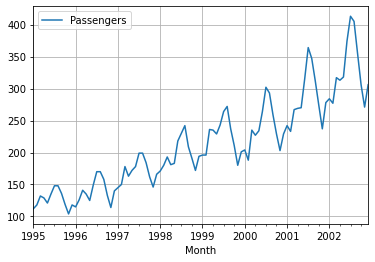

In [3]:
df = pd.DataFrame(airlines)
df.set_index('Month', inplace=True)
df.plot()
plt.grid()

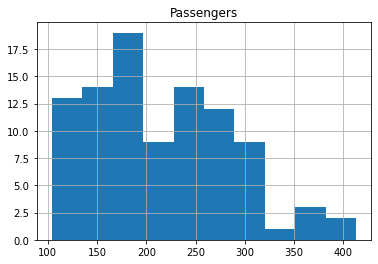

In [4]:
df.hist();

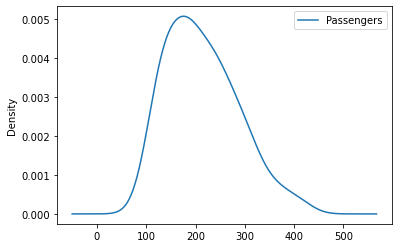

In [5]:
df.plot(kind='kde');

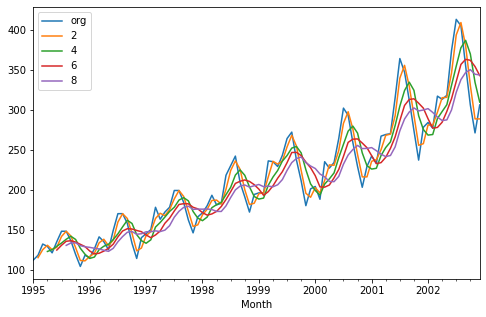

In [6]:
plt.figure(figsize=(8,5))
airlines.Passengers.plot(label='org')
for i in range(2,10,2):
        airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best');

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

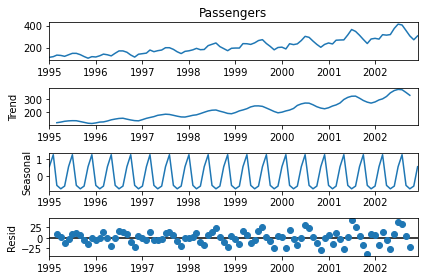

In [8]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=5)
decompose_ts_add.plot()
plt.show()

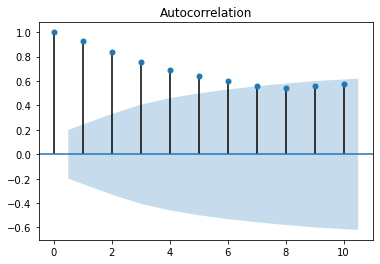

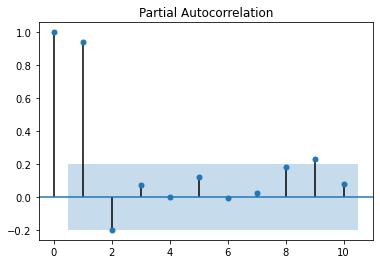

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=10)
tsa_plots.plot_pacf(airlines.Passengers,lags=10)
plt.show()

In [10]:
Train = airlines.head(86)
test = airlines.tail(10)

In [11]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [14]:
# Simple exponential method
ses_model = SimpleExpSmoothing(Train['Passengers']).fit()
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
MAPE(pred_ses,test.Passengers)

17.062362645814893

In [15]:
# Holt method
hw_model = Holt(Train['Passengers']).fit()
pred_hw = hw_model.predict(start = test.index[0], end = test.index[-1])
MAPE(pred_hw,test.Passengers)

15.083780334336817

In [16]:
# Holt winter exponential smoothing additive seasonality & trend
hwe_model_add_add = ExponentialSmoothing(Train['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0], end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

1.9855537600163498

In [17]:
# Holt winter exponential smoothing multiplicative seasonality & additive trend
hwe_model_mul_add = ExponentialSmoothing(Train['Passengers'], seasonal = 'mul', trend = 'add', seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0], end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

3.3288773664636175

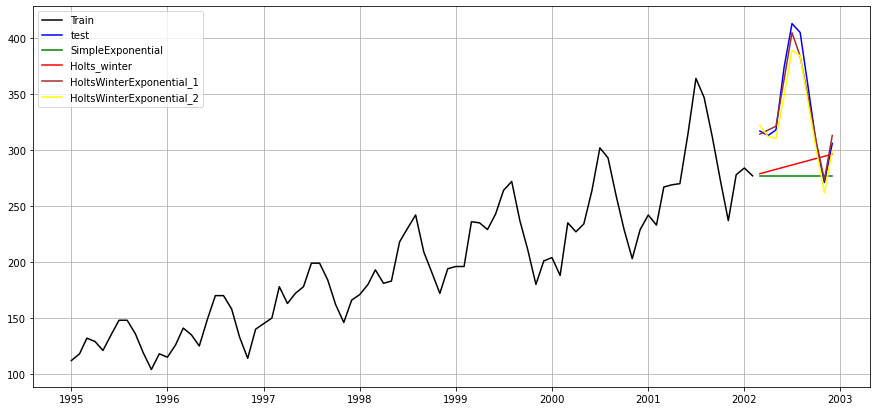

In [18]:
plt.figure(figsize=(15,7))
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(test.index, test["Passengers"], label='test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')
plt.grid()

In [19]:
hwe_model_add_add = ExponentialSmoothing(airlines['Passengers'], seasonal = 'add', trend = 'add', seasonal_periods = 12).fit()

In [20]:
hwe_model_add_add.forecast(10)

2003-01-01    320.924021
2003-02-01    313.638039
2003-03-01    352.925020
2003-04-01    350.350301
2003-05-01    356.060922
2003-06-01    408.899129
2003-07-01    446.143114
2003-08-01    433.358026
2003-09-01    382.762459
2003-10-01    336.170254
Freq: MS, dtype: float64